##Não consegui organizar o código então pedi pro ChatGPT me auxilar a buscar direto do GitHub

##Seguindo o código do trabalho, esta etapa refere-se ao estudo de deformações em placa 2D

In [ ]:
# 1. Remover a pasta antiga para evitar conflitos (caso exista)
!rm -rf PINN_Comp_Mech

# 2. Clonar o repositório do GitHub
!git clone https://github.com/JinshuaiBai/PINN_Comp_Mech.git

# 3. Navegar para a pasta do código 2D_collocation
%cd /content/PINN_Comp_Mech/2D_collocation

# 4. Listar arquivos para saber o script principal e confirmar estrutura
!ls

# 5. Ajustar sys.path para importar a pasta 'lib'
import sys
sys.path.append('/content/PINN_Comp_Mech/2D_collocation')

# 6. Corrigir o mesmo problema do TensorFlow com o shape (se existir)
# No 3D tivemos que corrigir em lib/Pre/FNN.py, vamos verificar se existe esse arquivo e corrigir

import os
fnn_path = 'lib/Pre/FNN.py'
if os.path.isfile(fnn_path):
    lines = open(fnn_path).readlines()
    # Procura a linha que tem Input e corrige para shape=(n_input,)
    for i, line in enumerate(lines):
        if 'tf.keras.layers.Input' in line and '(n_input)' in line:
            lines[i] = line.replace('(n_input)', '(n_input,)')
            open(fnn_path, 'w').writelines(lines)
            print(f"Corrigido {fnn_path} na linha {i+1}")

# 7. Rodar o script principal (provavelmente Main.py, mas confirme pelo ls)
!python Main.py


Cloning into 'PINN_Comp_Mech'...
remote: Enumerating objects: 327, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 327 (delta 17), reused 6 (delta 6), pack-reused 304 (from 2)
Receiving objects: 100% (327/327), 347.57 KiB | 1.82 MiB/s, done.
Resolving deltas: 100% (110/110), done.
/content/PINN_Comp_Mech/2D_collocation
Description.md	lib		sigma_x.png   sigma_y.tiff  u.png   v.tiff
hist_loss.png	Main.py		sigma_x.tiff  tau_xy.png    u.tiff
hist_loss.tiff	PINN_Comp_Mech	sigma_y.png   tau_xy.tiff   v.png
2025-08-11 22:09:10.239158: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754950150.261661    8525 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754950150.268217    8525 cuda

Pastas com conteudo resultante da simulação

In [ ]:
!ls -l



total 230348
-rw-r--r-- 1 root root       56 Aug 11 21:36 Description.md
-rw-r--r-- 1 root root 14657966 Aug 11 21:40 hist_loss.tiff
drwxr-xr-x 4 root root     4096 Aug 11 21:36 lib
-rw-r--r-- 1 root root     3526 Aug 11 21:36 Main.py
-rw-r--r-- 1 root root 44237006 Aug 11 21:39 sigma_x.tiff
-rw-r--r-- 1 root root 44237006 Aug 11 21:40 sigma_y.tiff
-rw-r--r-- 1 root root 44237006 Aug 11 21:40 tau_xy.tiff
-rw-r--r-- 1 root root 44237006 Aug 11 21:39 u.tiff
-rw-r--r-- 1 root root 44237006 Aug 11 21:39 v.tiff


Imagens do resultado


In [ ]:
from IPython.display import Image, display

display(Image('hist_loss.tiff'))
display(Image('sigma_x.tiff'))
display(Image('sigma_y.tiff'))
display(Image('tau_xy.tiff'))
display(Image('u.tiff'))
display(Image('v.tiff'))


ValueError: Cannot embed the 'tiff' image format

Correções da GEMINI para a conversão de imagens


## Install necessary library

Instalação de biblioteca para conversão de imagem



In [ ]:
%pip install Pillow

conversão de imagens TIFF para PNG



In [ ]:
from PIL import Image
import os

def convert_tiff_to_png(tiff_path):
    """Converts a TIFF image to PNG format."""
    try:
        img = Image.open(tiff_path)
        png_path = os.path.splitext(tiff_path)[0] + '.png'
        img.save(png_path, 'PNG')
        print(f"Converted {tiff_path} to {png_path}")
        return png_path
    except Exception as e:
        print(f"Error converting {tiff_path}: {e}")
        return None

tiff_files = ['hist_loss.tiff', 'sigma_x.tiff', 'sigma_y.tiff', 'tau_xy.tiff', 'u.tiff', 'v.tiff']
png_files = [convert_tiff_to_png(f) for f in tiff_files]

Converted hist_loss.tiff to hist_loss.png
Converted sigma_x.tiff to sigma_x.png
Converted sigma_y.tiff to sigma_y.png
Converted tau_xy.tiff to tau_xy.png
Converted u.tiff to u.png
Converted v.tiff to v.png


##Print de resultados

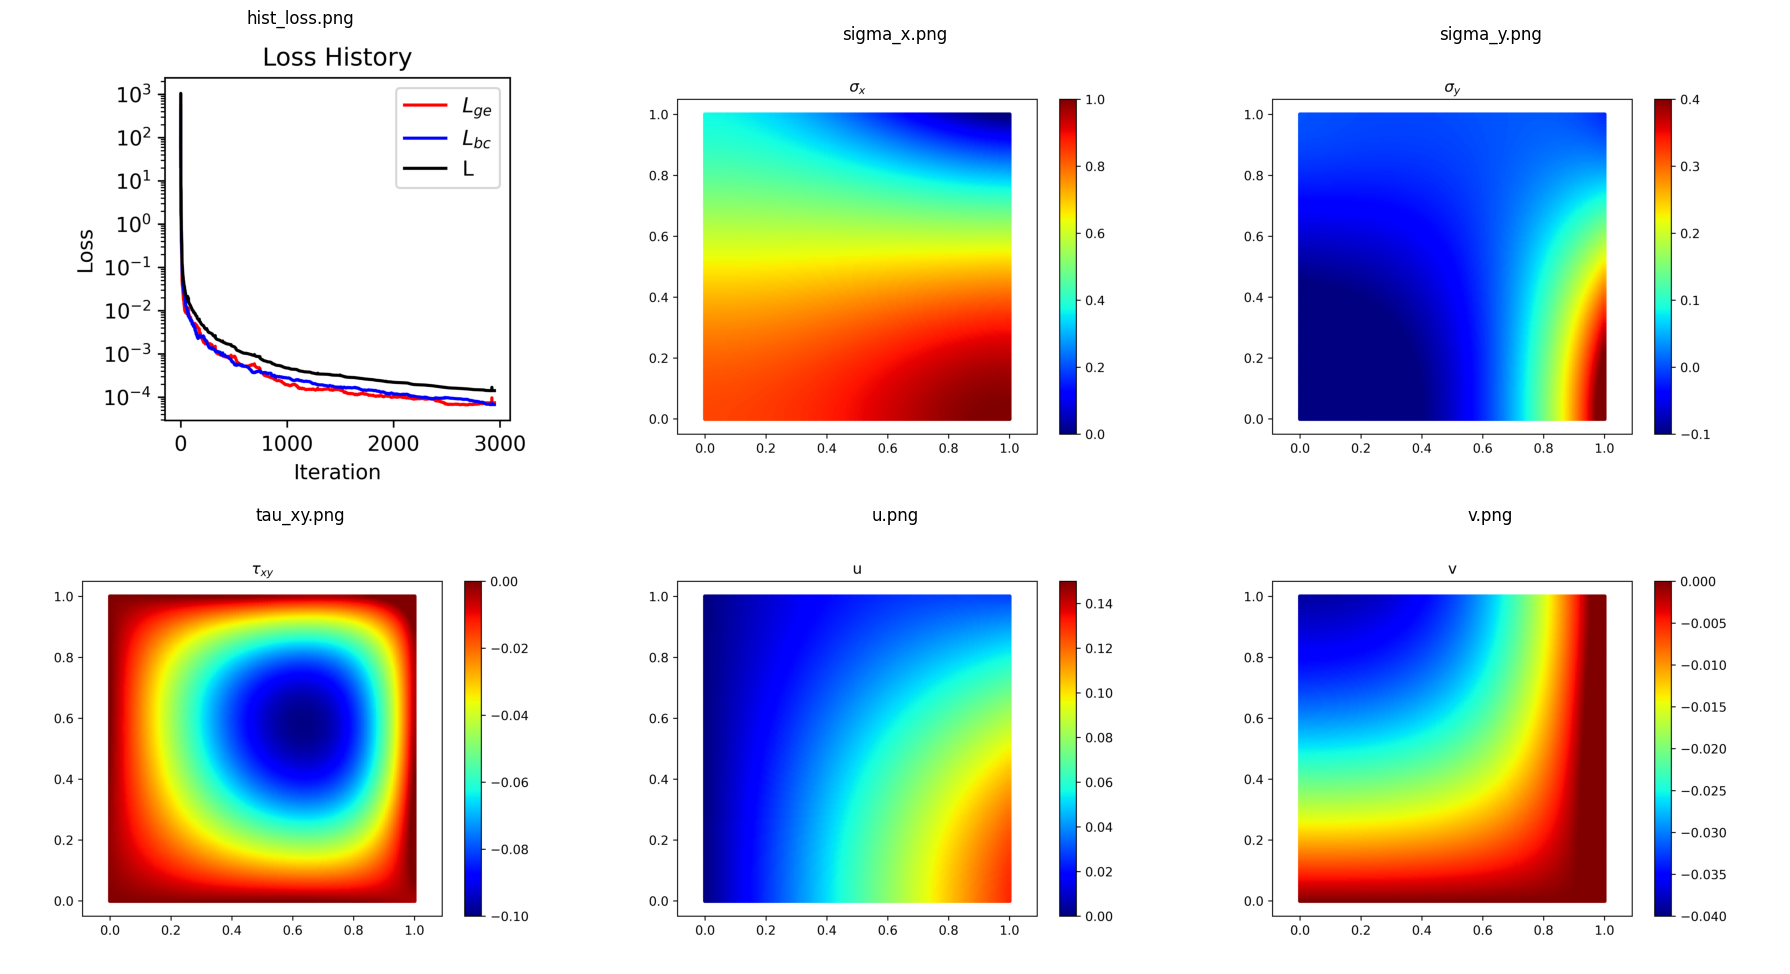

In [ ]:
# from IPython.display import Image, display

# png_files = ['hist_loss.png', 'sigma_x.png', 'sigma_y.png', 'tau_xy.png', 'u.png', 'v.png']

# for png_file in png_files:
#     display(Image(filename=png_file, width=400, height=400))  # largura 400 pixels, ajuste como quiser
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

png_files = ['hist_loss.png', 'sigma_x.png', 'sigma_y.png', 'tau_xy.png', 'u.png', 'v.png']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 linhas, 3 colunas

for ax, file in zip(axes.flatten(), png_files):
    img = mpimg.imread(file)
    ax.imshow(img)
    ax.axis('off')  # sem eixos para visualização limpa
    ax.set_title(file)

plt.tight_layout()
plt.show()
